# Simple network creation

This example creates a striatal network of 100 dSPN and 100 iSPN neurons. You can also do this using the command line interface, see "snudda -h".

This notebook is started in the ```Snudda/snudda/examples/notebooks``` directory, as all paths are given relative to there.

First we create a ```network-config.json``` file in ```networks/simple_example``` which is a subdirectory to the ```notebooks``` directory that will be automatically created at runtime. The 200 neurons are placed inside a cube, with cell density 80500 neurons/mm3. The neuron morphologies and parameters are taken from the ```Snudda/snudda/data/neurons/dspn``` and ```ispn``` folders.

Here we have set the ```random_seed``` to ```12345```.

In [1]:
import os
from snudda import SnuddaInit

network_path = os.path.join("networks","simple_example")
snudda_data = os.path.join("..", "..", "snudda", "data")  # "/home/hjorth/HBP/BasalGangliaData/data/" 
si = SnuddaInit(network_path=network_path, random_seed=12345, snudda_data=snudda_data)
si.define_striatum(num_dSPN=100, num_iSPN=100, num_FS=0, num_LTS=0, num_ChIN=0, neuron_density=80500,
                    volume_type="cube", neurons_dir="$DATA/neurons")
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
No directory $DATA/neurons/striatum/ngf, skipping NGF cells.
Writing networks/simple_example/network-config.json


In [2]:
from snudda import Snudda
snd = Snudda(network_path=network_path)
snd.create_network()

# This reads in the network-config.json file and places the dSPN and iSPN neurons within the cube volume, then writes the positions to the network-neuron-positions.hdf5 file.
# Touch detection to locate putative synapses
# Prune the synapses in the network based on the connection information in the network-config.json file.

Placing neurons
Network path: networks/simple_example
Reading SNUDDA_DATA=../../snudda/data from networks/simple_example/network-config.json
Generating 1094 points for networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj
n_points = 1042, previous close_pairs = 1589
n_points = 993, previous close_pairs = 1290
n_points = 947, previous close_pairs = 1062
n_points = 904, previous close_pairs = 878
n_points = 864, previous close_pairs = 715
n_points = 827, previous close_pairs = 598
n_points = 793, previous close_pairs = 498
n_points = 762, previous close_pairs = 406
n_points = 734, previous close_pairs = 345
n_points = 708, previous close_pairs = 296
n_points = 685, previous close_pairs = 249
n_points = 665, previous close_pairs = 206
n_points = 664, previous close_pairs = 168
n_points = 498, previous close_pairs = 166
Filtering 498 points..
Filtering, keeping inside points: 250 / 498
stop_parallel disabled, to keep pool running.

Execution time: 0.1s
Touch detection


Use matplotlib to plot the network. Note that this can be quite slow for larger networks.

Reading SNUDDA_DATA=../../snudda/data from networks/simple_example/network-config.json


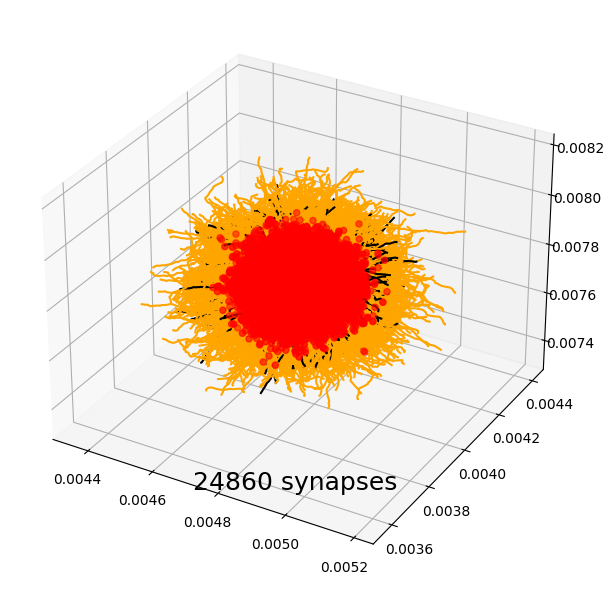

In [3]:
from snudda.plotting import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot()
pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)